In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# **Introduction**

Consider a simple linear SDE: $dX_t = f(\alpha X_t + \beta)dt + \sigma dW_t$,     $X_0 = x_0$.

Where:
$\alpha$ controls rate of growth or decay.
$\beta$ shifts process up or down.
$\sigma$ is a constant diffusion coefficient.
$W_t$ is a standard Wiener process.

### **What happens when $\alpha$ is 0?**: 
The process reduces to brownian motion with drift.


The expectation when $\alpha \neq 0$ is given by $E[X_t] = X_0e^{\alpha t} + \frac{\beta}{\alpha}(e^{\alpha t} - 1)$

### **What does the expection converge to when $\alpha < 0$? What about when $\alpha > 0$?**: 
When $\alpha < 0$, the expectation converges to $-\beta / \alpha$, when $\alpha > 0$, it doesnt converge but instead grows exponentially.

### Simulate using the Euler-Maruyama method for $\alpha=1$, $\alpha=-1$ and $\alpha=0$ and confirm your findings.
Its a bit hard to actually confirm anything except $\alpha=1$, maybe need to rethink this task.

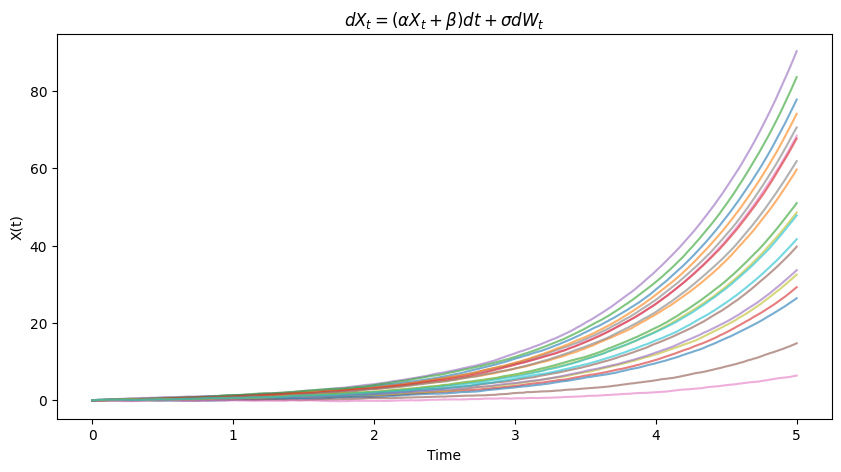

In [2]:
# Set this yourself.
alpha = 1

# Parameters  
beta = 0.3   
sigma = 0.2
X0 = 0.0
T = 5.0
dt = 0.01
N = int(T / dt)
M = 20 # Generate M different outcomes.

t = np.linspace(0, T, N)
X = np.zeros((M, N))
X[:, 0] = X0

# Sample 
for i in range(M):
    # Sample brownian
    ## YOUR CODE HERE
    ## ANSWER ##
    W = np.random.normal(0, np.sqrt(dt), N-1)
    ## END ANSWER ##
    for j in range(1, N):
        # Compute next time step
        ## ANSWER ##
        X[i, j] = X[i, j-1] + (alpha * X[i, j-1] + beta) * dt + sigma * W[j-1]
        ## END ANSWER ##

# Plot results
plt.figure(figsize=(10, 5))
for i in range(M):
    plt.plot(t, X[i, :], alpha=0.6)

plt.xlabel("Time")
plt.ylabel("X(t)")
plt.title("$dX_t = (\\alpha X_t + \\beta)dt + \\sigma dW_t$")
plt.show()


# **Concentration of measure**

Let $X = (X_1, X_2, ..., X_d)$ be a d-dimensional standard Gaussian vector where $X_i \sim \mathcal{N}(0,1)$.

The euclidian norm and radius of $X$ is: $R = ||X|| = \sqrt{X_1^2 + X_2^2 + ... + X_d^2}$ 

As each $X_i^2$ is a chi-square distribution with one degree of freedom, the sum $S = X_1^2 + X_2^2 + ... + X_d^2$ is a chi-square distribution with $d$ degrees of freedom: $S \sim \chi^2_d$

Since $R = \sqrt{S}$ then $R = \sim \chi_d$.

The normalized radius is $Y = R / \sqrt{d}$ as the euclidian norm scales with $\sqrt{d}$ which gives us $Y = \sqrt{\frac{S}{d}}$.

Using $S \sim \chi^2_d$ again, we get that $Y = \sqrt{\frac{\chi^2_d}{d}}$

### **Task 1:** Derive an expression for $\mathbb{E}[Y]$ and $\text{Var}[Y]$ and approximate its value when $d \rightarrow \infty$
I wasnt sure on how to do this.

### **Task 2:** Simulate and confirm the results

We can see how the distribution of radii are squeezed into a narrow range with variance 0 and mean 1 as d goes to infinity.

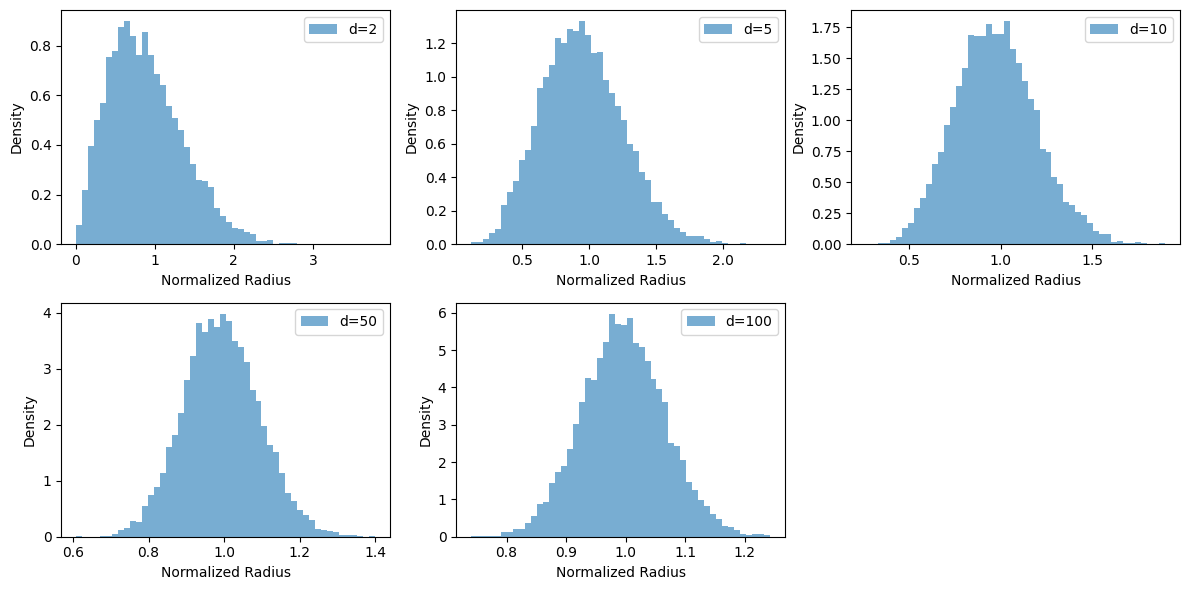

   Dimension (d)  Radius Mean  Radius Variance
0              2     0.889366         0.216804
1              5     0.950303         0.092509
2             10     0.974315         0.049485
3             50     0.993545         0.010169
4            100     0.996269         0.004892


In [3]:
# Parameters
dimensions = [2, 5, 10, 50, 100]
num_samples = 10000

means = []
variances = []

plt.figure(figsize=(12, 6))

for i, d in enumerate(dimensions):
    # Generate gaussians
    X = np.random.randn(num_samples, d)
    R = np.linalg.norm(X, axis=1)
    R_normalized = R / np.sqrt(d)
    
    means.append(np.mean(R_normalized))
    variances.append(np.var(R_normalized))
    
    # Plot
    plt.subplot(2, 3, i + 1)
    plt.hist(R_normalized, bins=50, density=True, alpha=0.6, label=f"d={d}")
    
    plt.xlabel("Normalized Radius")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

df_results_normalized = pd.DataFrame({
    "Dimension (d)": dimensions,
    "Radius Mean": means,
    "Radius Variance": variances
})

print(df_results_normalized)


# **Îtos Lemma**

Consider the geometric brownian motion $dX_t = \mu X_t dt + \sigma X_t dW_t$.

We define a transformation $Y_t = \phi(X_t) = \ln(X_t)$.

### **Task 1:** Derive the SDE $dY_t$ for $Y_t$ using Îtos Lemma.

Solution:
$dY_t = \phi'(X_t)dX_t + \frac{1}{2}\phi''(X_t)(dX_t)^2$
$\phi'(X_t) = \frac{1}{X_t}$
$\phi''(X_t) = -\frac{1}{X_t^2}$
$dY_t = \frac{1}{X_t}dX_t + \frac{1}{2}(-\frac{1}{X_t^2})(dX_t)^2$

$(dX_t)^2 = (\mu X_t dt + \sigma X_t dW_t)^2$
$(dX_t)^2 = \mu^2X_t^2dt^2 + 2\mu X_t \sigma X_t dtdW_t + \sigma^2 X_t^2 (dW_t)^2)^2$

$(dt)^2$ is extremely tiny -> can approximate to 0.
$dtdW_t$ is also tiny as $dW_t$ is of order $\sqrt{dt}$ and $dt$ is miniscule. -> Can approximate to 0.
For $(dW_t)^2$ we know $W_t \sim \mathcal{N}(0,1)$, and $\text{Var}\[X\] = E[X^2] - (E[X])^2 \rightarrow E[X^2] = \text{Var}[X] + (E[X])^2$ and we know $\mathbb{E}[dW_t] = 0$ so $\mathbb{E}[(dW_t)^2] = dt$
This gives us that $(dX_t)^2 = \sigma^2 X_t^2 dt$

Substitute in $(dX_t)^2$ and $dX_t$ into $dY_t$
$dY_t = \frac{1}{X_t}(\mu X_t dt + \sigma X_t dW_t)+ \frac{1}{2}(-\frac{1}{X_t^2})(\sigma^2 X_t^2 dt)$
Simplify: $dY_t = \mu dt + \sigma dW_t - \frac{\sigma^2}{2}dt$
**Answer:** $dY_t = (\mu - \frac{\sigma^2}{2}) dt + \sigma dW_t$

### **Task 2:**: Simulate both $Y_t$ using the derived SDE and $X_t$ (transformed after simulating) and confirm that they have the same results. Dont forget to use a shared Wiener process.  


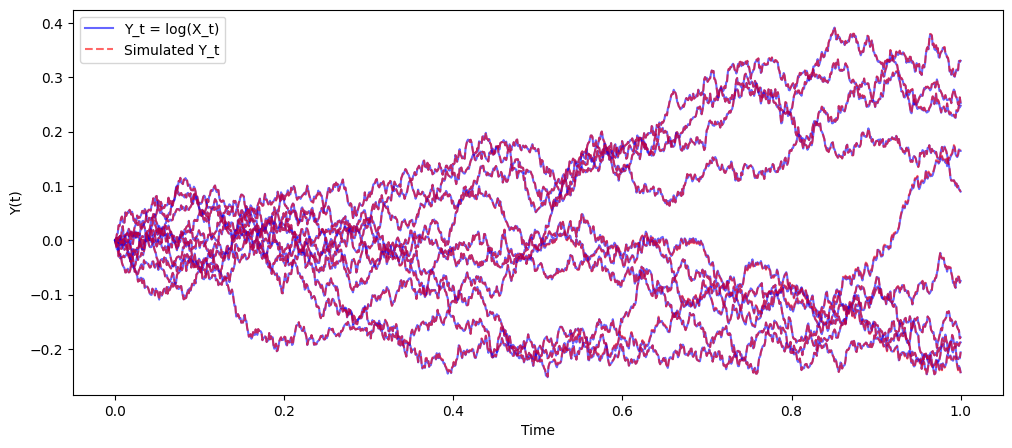

In [4]:
# Parameters
mu = 0.1
sigma = 0.2
X0 = 1
T = 1.0 
dt = 0.001
N = int(T / dt)
M = 10 

time_grid = np.linspace(0, T, N)

X = np.zeros((M, N))
Y_transformed = np.zeros((M, N))
Y_simulated = np.zeros((M, N))

# Start
X[:, 0] = X0
Y_transformed[:, 0] = np.log(X0)
Y_simulated[:, 0] = np.log(X0)

# Shared Wiener process
W_shared = np.random.normal(0, np.sqrt(dt), (M, N-1))

# Simulate X_t
for i in range(M):
    for j in range(1, N):
        X[i, j] = X[i, j-1] + mu * X[i, j-1] * dt + sigma * X[i, j-1] * W_shared[i, j-1]
        Y_transformed[i, j] = np.log(X[i, j])  # Applying transformation after simulating X_t

# Simulate Y_t using derived SDE
for i in range(M):
    for j in range(1, N):
        Y_simulated[i, j] = Y_simulated[i, j-1] + (mu - 0.5 * sigma**2) * dt + sigma * W_shared[i, j-1]

# Plot results
plt.figure(figsize=(12, 5))
for i in range(M):
    plt.plot(time_grid, Y_transformed[i, :], color='blue', alpha=0.6, label="Y_t = log(X_t)" if i == 0 else "")
    plt.plot(time_grid, Y_simulated[i, :], color='red', alpha=0.6, linestyle='dashed', label="Simulated Y_t" if i == 0 else "")

plt.xlabel("Time")
plt.ylabel("Y(t)")
plt.legend()
plt.show()

# **Riemann integral approximation** 

The Ornstein-Uhlenbeck process $dX_t = -\theta X_t dt + \sigma dW_t$ has the following analytical solution: $X_t = X_0e^{-\theta t} + \sigma \int_0^t e^{- \theta(t-s)}dW_s$.

### **Task 1:** Approximate the integral using Riemann sums.

### **Task 2:** Simulate $X_t$ using both the Riemann approximation and the Euler-Maruyama method.
